# 前処理

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import japanize_matplotlib
sns.set(font="IPAexGothic")

import os
os.chdir("../")

In [2]:
word_matched_rate = pd.read_csv("csv/word_matched_rate.csv")
popularities = pd.read_csv("csv/popularities.csv")
word_matched_rate = pd.merge(word_matched_rate, popularities)

center = len(word_matched_rate) // 2

word_matched_rate["一致率_A"] = word_matched_rate["一致した単語数_A"] / word_matched_rate["単語数_A"]
word_matched_rate["一致率_S"] = word_matched_rate["一致した単語数_S"] / word_matched_rate["単語数_S"]

spotify_popularity = word_matched_rate.sort_values("Spotify", ascending=False)
youtube_popularity = word_matched_rate.sort_values("Youtube", ascending=False)

# Youtubeにおける一致率の散布図

/tmp/ipykernel_86284/3106997234.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


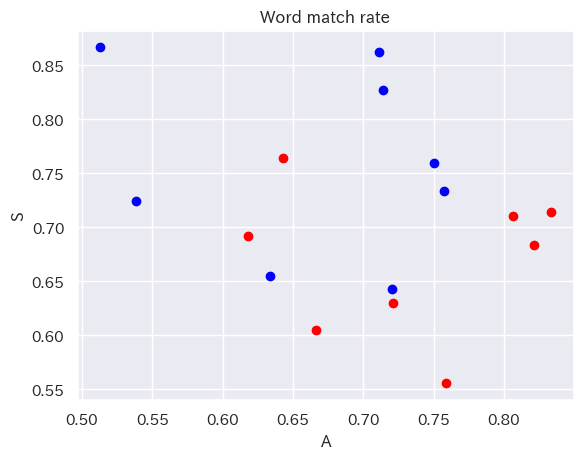

In [3]:
pop_youtube = youtube_popularity[:center]
unpop_youtube = youtube_popularity[center:]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(pop_youtube["一致率_A"], pop_youtube["一致率_S"], c='blue')
ax.scatter(unpop_youtube["一致率_A"], unpop_youtube["一致率_S"], c='red')
ax.set_title("Word match rate")
ax.set_xlabel('A')
ax.set_ylabel('S')
fig.show()

# Spotifyにおける一致率の散布図

/tmp/ipykernel_86284/707704620.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


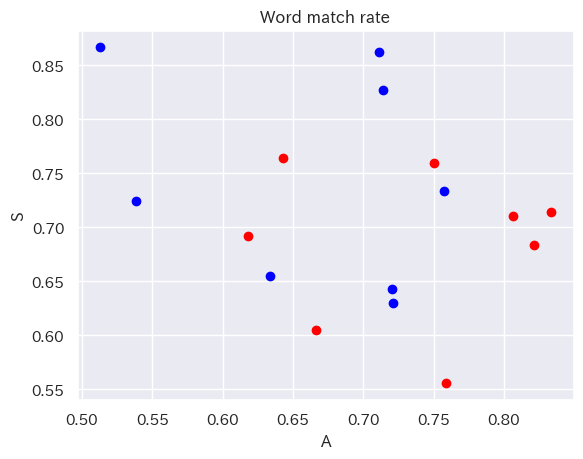

In [4]:
pop_spotify = spotify_popularity[:center]
unpop_spotify = spotify_popularity[center:]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(pop_spotify["一致率_A"], pop_spotify["一致率_S"], c='blue')
ax.scatter(unpop_spotify["一致率_A"], unpop_spotify["一致率_S"], c='red')
ax.set_title("Word match rate")
ax.set_xlabel('A')
ax.set_ylabel('S')
fig.show()

# Aメロとサビの一致率の差の計算

In [5]:
pop_youtube_distance = np.abs(pop_youtube["一致率_S"] - pop_youtube["一致率_A"]) / np.sqrt(2)
unpop_youtube_distance = np.abs(unpop_youtube["一致率_S"] - unpop_youtube["一致率_A"]) / np.sqrt(2)

pop_spotify_distance = np.abs(pop_spotify["一致率_S"] - pop_spotify["一致率_A"]) / np.sqrt(2)
unpop_spotify_distance = np.abs(unpop_spotify["一致率_S"] - unpop_spotify["一致率_A"]) / np.sqrt(2)

# Youtubeにおける一致率の差のヴァイオリンプロットと箱ひげ図

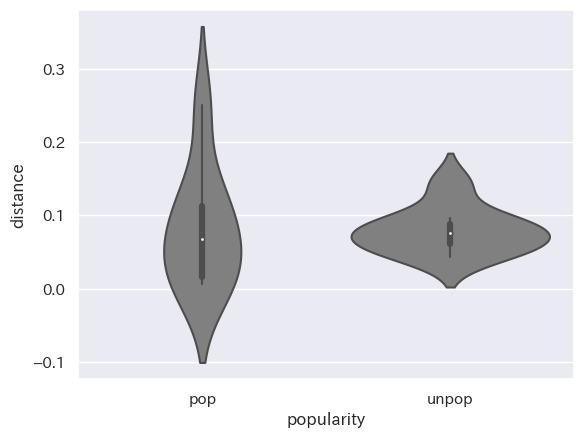

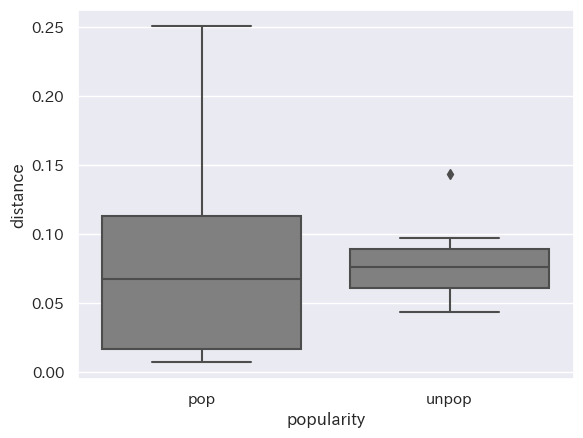

In [6]:
popularity = ["pop"] * len(pop_youtube_distance)
popularity.extend(["unpop"] * len(unpop_youtube_distance))

df_youtube_pop = pd.DataFrame({
    "popularity": ["pop"] * len(pop_youtube_distance),
    "distance": pop_youtube_distance,
})
df_youtube_unpop = pd.DataFrame({
    "popularity": ["unpop"] * len(unpop_youtube_distance),
    "distance": unpop_youtube_distance,
})
df_youtube = pd.concat([df_youtube_pop, df_youtube_unpop])

sns.violinplot(data=df_youtube, x="popularity", y="distance", color="gray")
plt.show()
sns.boxplot(data=df_youtube, x="popularity", y="distance", color='gray')
plt.show()

# Spotifyにおける一致率の差のヴァイオリンプロットと箱ひげ図

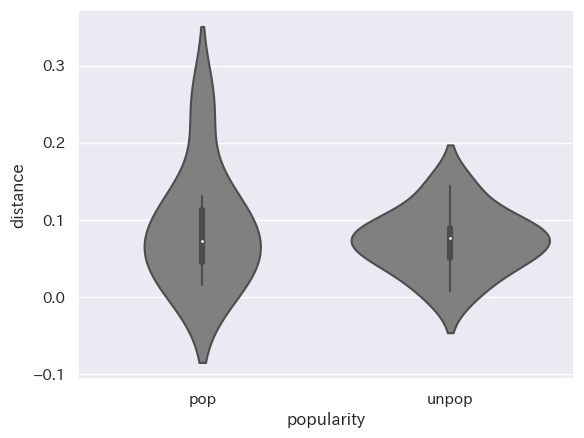

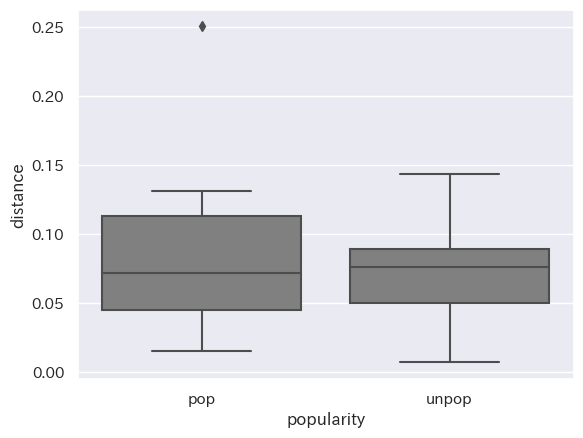

In [7]:
popularity = ["pop"] * len(pop_spotify_distance)
popularity.extend(["unpop"] * len(unpop_spotify_distance))

df_spotify_pop = pd.DataFrame({
    "popularity": ["pop"] * len(pop_spotify_distance),
    "distance": pop_spotify_distance,
})
df_spotify_unpop = pd.DataFrame({
    "popularity": ["unpop"] * len(unpop_spotify_distance),
    "distance": unpop_spotify_distance,
})
df_spotify = pd.concat([df_spotify_pop, df_spotify_unpop])

sns.violinplot(data=df_spotify, x="popularity", y="distance", color="gray")
plt.show()
sns.boxplot(data=df_spotify, x="popularity", y="distance", color='gray')
plt.show()

# t検定

In [8]:
# print(stats.ttest_ind(pop_youtube_distance, unpop_youtube_distance, equal_var=False, alternative='two-sided'))

In [9]:
# print(stats.ttest_ind(pop_spotify_distance, unpop_spotify_distance, equal_var=False, alternative='two-sided'))